In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from IPython.display import IFrame
import math as m

In [5]:
def calc_v_R(angle, delta_v_r, v_g = 220):
    return v_g*m.sin(m.radians(angle)) + delta_v_r

def calc_Radius(angle, R_g = 8.5):
    return R_g * m.sin(m.radians(angle))


DATA = np.genfromtxt('Experiment_8.txt', skip_header = 1, unpack = True)

v_g = 220 # [km/s]
R_g = 8.5 # [kpc]
v_R = []
R = []
l = []
rel_v_R = []
error = []

for i in range(len(DATA[0])):
    angle = round(DATA[0][i], 3)
    delta_v_R = round(DATA[1][i], 3)
    rel_v_R.append(delta_v_R)
    v_R.append(round(calc_v_R(angle, delta_v_R, v_g),3))
    R.append(round(calc_Radius(angle, R_g), 3))
    l.append(angle)
    error.append(round(DATA[2][i], 3))
    print('Radius: {}\tangle: {}\trel. velocity: {}\tvelocity: {}\t error:{}'.format(R[i], l[i], rel_v_R[i], v_R[i], error[i]))
    

Radius: 8.5	angle: 90.0	rel. velocity: 8.0	velocity: 228.0	 error:2.0
Radius: 8.495	angle: 88.0	rel. velocity: 10.0	velocity: 229.866	 error:2.0
Radius: 8.479	angle: 86.0	rel. velocity: 12.0	velocity: 231.464	 error:3.0
Radius: 8.453	angle: 84.0	rel. velocity: 12.0	velocity: 230.795	 error:3.0
Radius: 8.417	angle: 82.0	rel. velocity: 13.0	velocity: 230.859	 error:2.0
Radius: 8.371	angle: 80.0	rel. velocity: 15.0	velocity: 231.658	 error:4.0
Radius: 8.314	angle: 78.0	rel. velocity: 10.0	velocity: 225.192	 error:2.0
Radius: 8.248	angle: 76.0	rel. velocity: 11.0	velocity: 224.465	 error:2.0
Radius: 8.171	angle: 74.0	rel. velocity: 10.0	velocity: 221.478	 error:3.0
Radius: 8.084	angle: 72.0	rel. velocity: 14.0	velocity: 223.232	 error:4.0
Radius: 7.987	angle: 70.0	rel. velocity: 13.0	velocity: 219.732	 error:4.0
Radius: 7.881	angle: 68.0	rel. velocity: 16.0	velocity: 219.98	 error:3.0
Radius: 7.765	angle: 66.0	rel. velocity: 23.0	velocity: 223.98	 error:4.0
Radius: 7.64	angle: 64.0	rel. ve

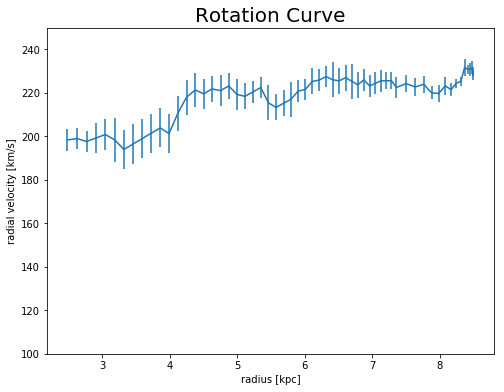

In [6]:
plt.figure(figsize=(8,6))
plt.errorbar(R, v_R, xerr = 0, yerr = error)

plt.title("Rotation Curve", fontsize = 20)
plt.xlabel("radius [kpc]")
plt.ylabel("radial velocity [km/s]")
#plt.xlim(0.0036,0.0063)
plt.ylim(100,250)
plt.show()

In [47]:
from astropy import units as u
from astropy import constants as const
# Umlaufzeit der Sonne um Galaxiezentrum
t = (2*np.pi*8.5*u.kpc/(v_g * u.km / u.s))
print(t.to(u.Myr))
# Winkelgeschwindigkeit der Sonne
w = 2*np.pi*v_g*u.km/u.s / (R_g*u.kpc)
print(w.decompose())
mass = (4 * np.pi**2 * (R_g*u.kpc)**3) / (const.G * t**2)
print(mass.to(u.solMass))

237.36828466306466 Myr
5.270272587517435e-15 1 / s
95654013822.33669 solMass
